<a href="https://colab.research.google.com/github/Karthika0804/Customer_ConversionPrediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Dataset Loading

In [3]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('/content/train (1).csv')
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
df['target'] = df["y"].map({"yes":1 , "no": 0})

In [5]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


In [6]:
df.shape

(45211, 12)

# DATA CLEANING FOR ALL **COLUMNS**

# AGE


In [7]:
df.age.dtypes

dtype('int64')

In [8]:
df.age.isna().sum()

0

In [9]:
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [10]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [11]:
q3 = df.age.quantile(0.75)
q1 = df.age.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(70.5, 10.5)

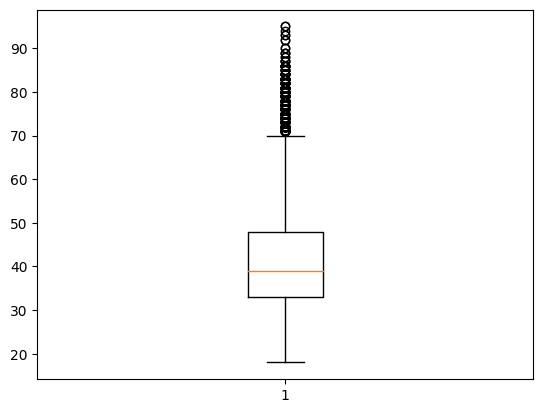

In [12]:
import matplotlib.pyplot as plt

# Creating plot
plt.boxplot(df['age'])

# show plot
plt.show()

Treating the outlier for age column

In [13]:
df.age = df.age.clip(lower_threshold, upper_threshold)

In [14]:
#checking after treating outlier
df.age.describe()

count    45211.000000
mean        40.868185
std         10.394895
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

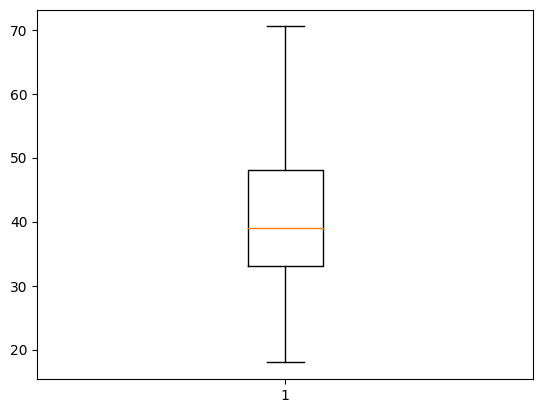

In [15]:
# Creating plot
plt.boxplot(df['age'])

# show plot
plt.show()

In [16]:
df["age"]

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    70.5
45208    70.5
45209    57.0
45210    37.0
Name: age, Length: 45211, dtype: float64

In [17]:
df['age']=df["age"].astype(int)

In [18]:
df["age"].dtypes

dtype('int64')

In [19]:
#checking for the percentage of how many people get insured? compared with Target vs Age
df.groupby('age')['target'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
23    0.217822
24    0.225166
25    0.214421
26    0.166460
27    0.155116
28    0.156069
29    0.144304
30    0.123506
31    0.103206
32    0.105995
33    0.106491
34    0.102591
35    0.110348
36    0.107973
37    0.100236
38    0.098226
39    0.096167
40    0.085609
41    0.092951
42    0.089372
43    0.088717
44    0.081866
45    0.087171
46    0.100426
47    0.103860
48    0.082247
49    0.101610
50    0.076677
51    0.082265
52    0.093304
53    0.095398
54    0.103576
55    0.094293
56    0.087404
57    0.094203
58    0.097297
59    0.114286
60    0.164430
61    0.387755
62    0.487500
63    0.389610
64    0.472973
65    0.355932
66    0.380952
67    0.425926
68    0.583333
69    0.386364
70    0.424188
Name: target, dtype: float64

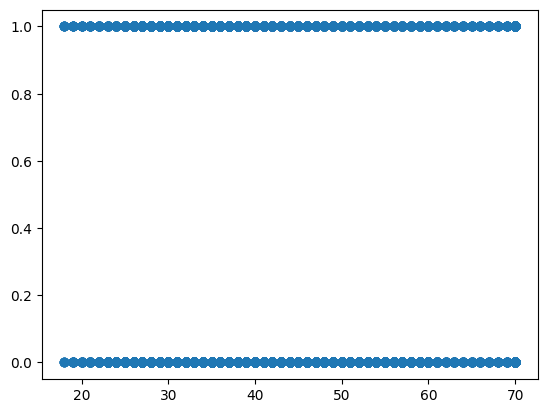

In [20]:
## plot using scatter plot
## Analysis of insured percentage of people according to age with target

x=df["age"]
y=df["target"]
plt.scatter(x, y)
plt.show()

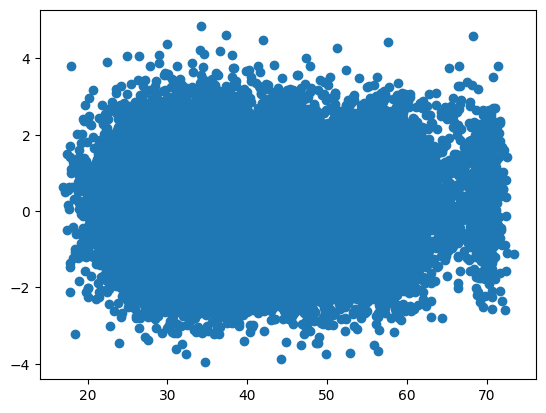

In [21]:
#df[['age','target']].plot.scatter(x = 'age', y = 'target')
import numpy
#import matplotlib.pyplot as plt

x = numpy.random.normal(df["age"])
y = numpy.random.normal(df["target"])

plt.scatter(x, y)
plt.show()

Text(0, 0.5, 'y')

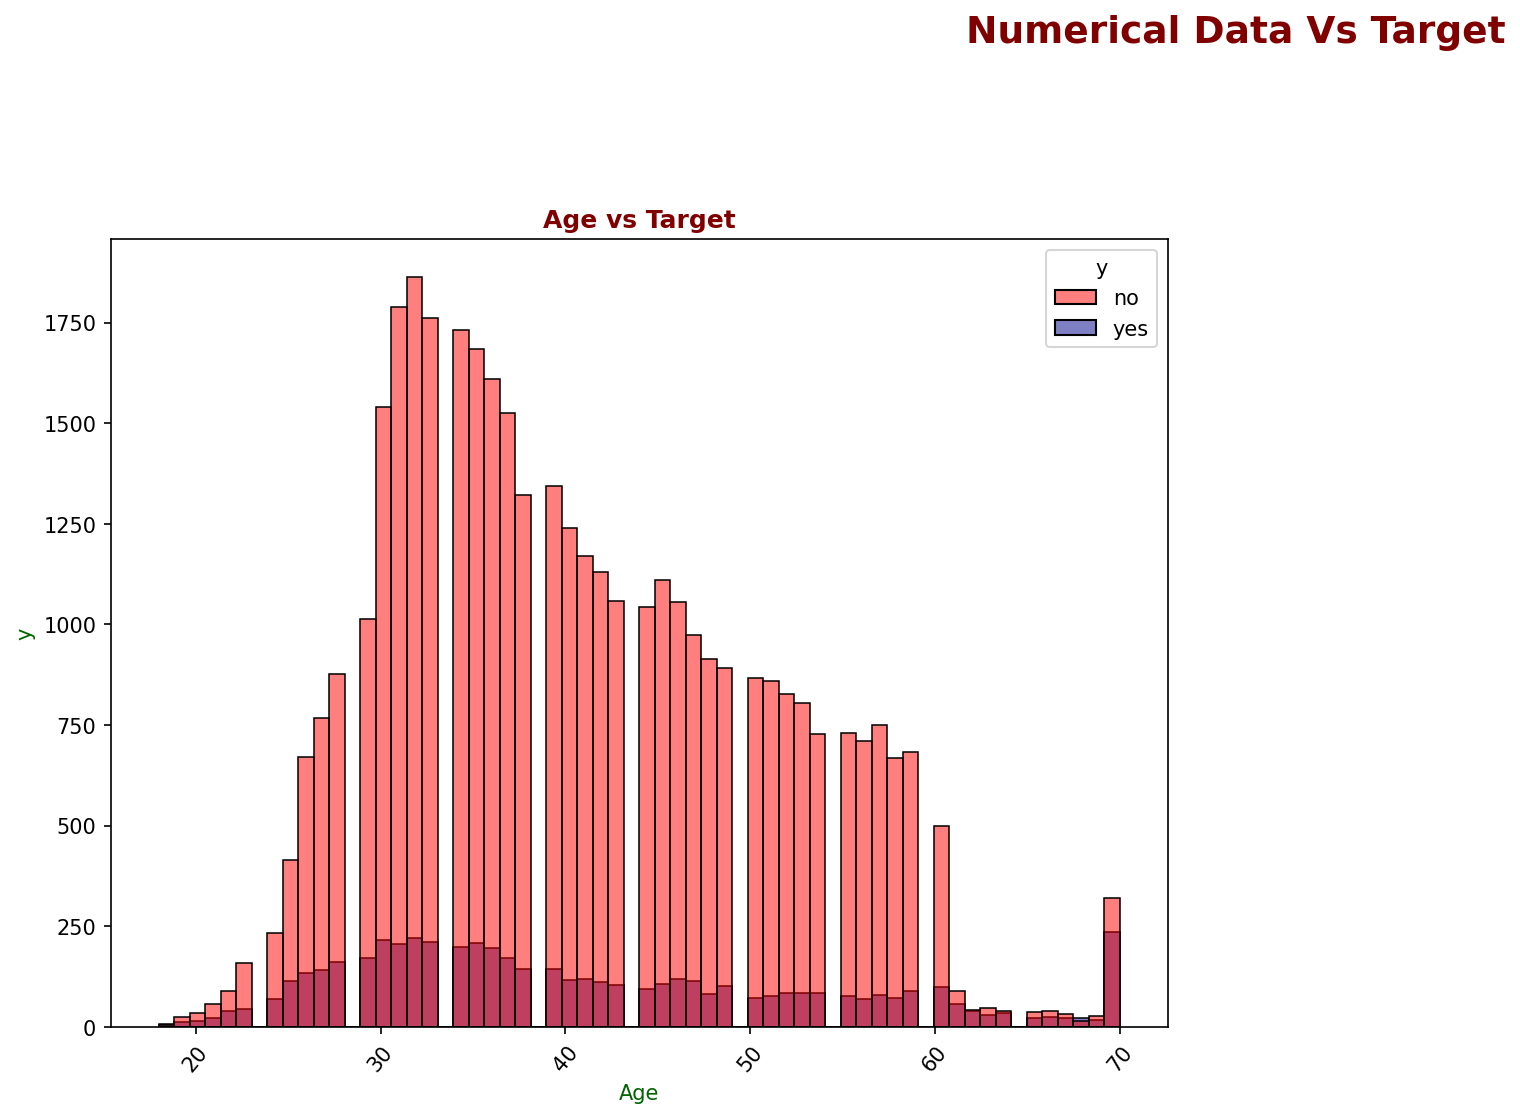

In [22]:
import seaborn as sns
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon')

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['red', 'DarkBlue']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

In [23]:
df[['age','target']].corr()


,age,target
age,1.00000,0.01847
target,0.01847,1.00000


#JOB

In [24]:
df.job.dtypes

dtype('O')

In [25]:
df.job.describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [26]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [27]:
df.groupby('job')['target'].mean()

job
admin.           0.122027
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137556
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: target, dtype: float64

In [28]:
# droping the column unknown
#outof 45211 rows, deletion of 288 rows will not get more impact on dataset so planning to delete

#replacing unknown value as null
df['job'] =df['job'].replace('unknown',np.nan)

In [29]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [30]:
df.job.isnull().sum()

288

In [31]:
#removing null values from job column
df=df.dropna(subset=['job'])

In [32]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

Text(0, 0.5, 'y')

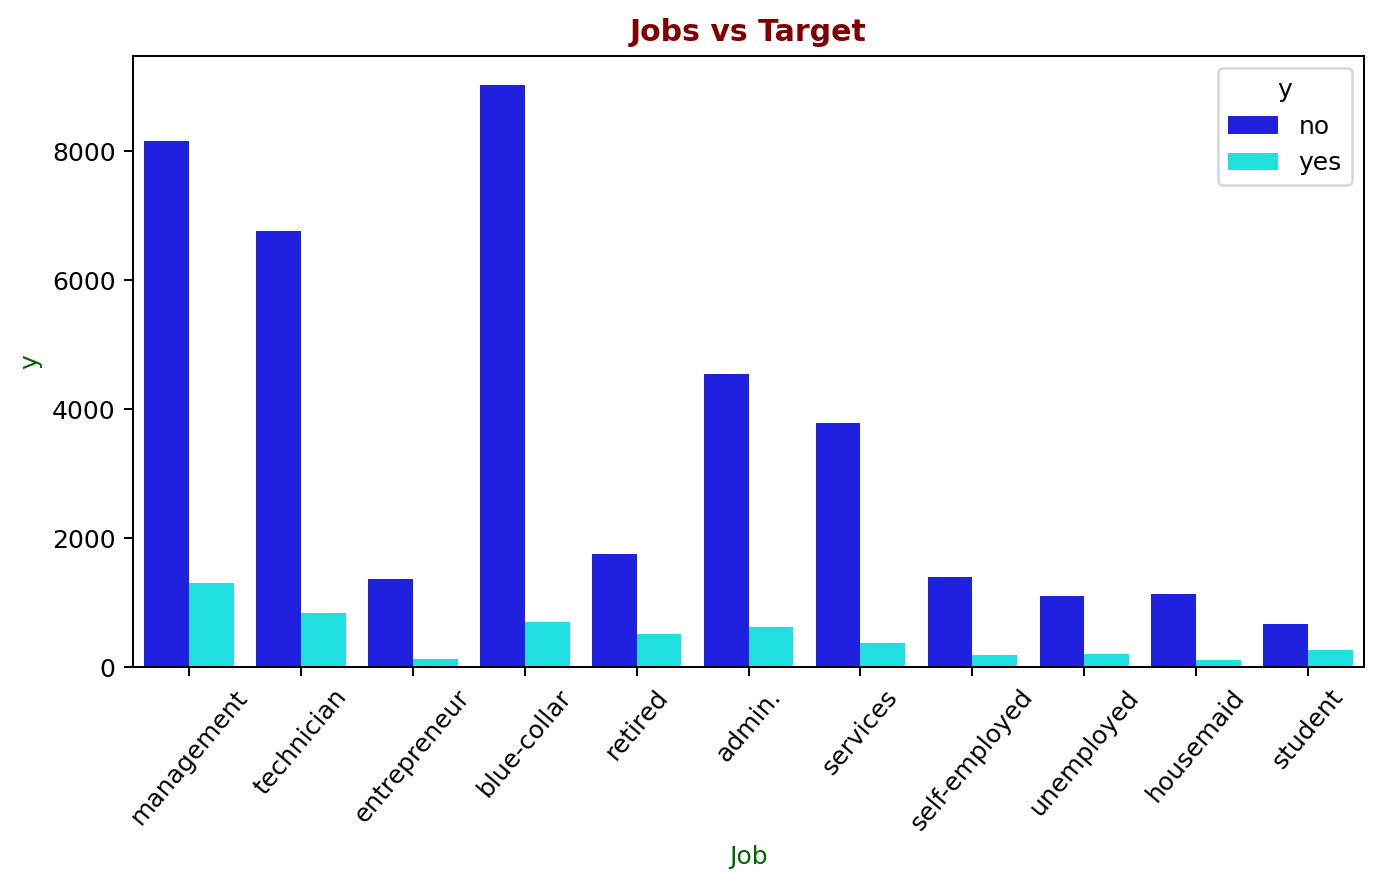

In [33]:
import seaborn as sns
plt.figure(figsize=(30,15), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['blue', 'cyan']
sns.countplot(x='job',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

# Martial Status

In [34]:
df['marital'].value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

In [35]:
df.marital.isna().sum()

0

In [36]:
df.groupby('marital')['target'].mean()

marital
divorced    0.119653
married     0.101218
single      0.149348
Name: target, dtype: float64

Text(0, 0.5, 'y')

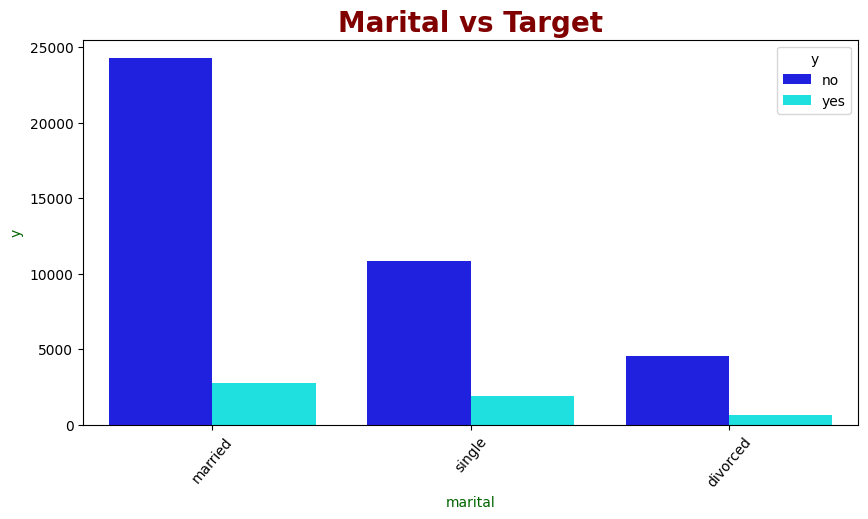

In [37]:
plt.figure(figsize=(10,5), dpi=100)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
#plt.subplot(3,3,1)
my_colors = ['blue', 'cyan']
sns.countplot(x='marital',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital vs Target',fontsize=20,fontweight='bold', color='maroon')
plt.xlabel('marital', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

# Education

In [38]:
df['education_qual'].value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education_qual, dtype: int64

In [39]:
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0


In [40]:
# droping the column unknown
#outof 45211 rows, deletion of 1730 rows will not get more impact on dataset so planning to delete

#replacing unknown value as null
df['education_qual'] =df['education_qual'].replace('unknown',np.nan)

In [41]:
df = df. dropna(subset=['education_qual'])

In [42]:
df['education_qual'].value_counts()

secondary    23131
tertiary     13262
primary       6800
Name: education_qual, dtype: int64

In [43]:
df.shape

(43193, 12)

Text(0, 0.5, 'y')

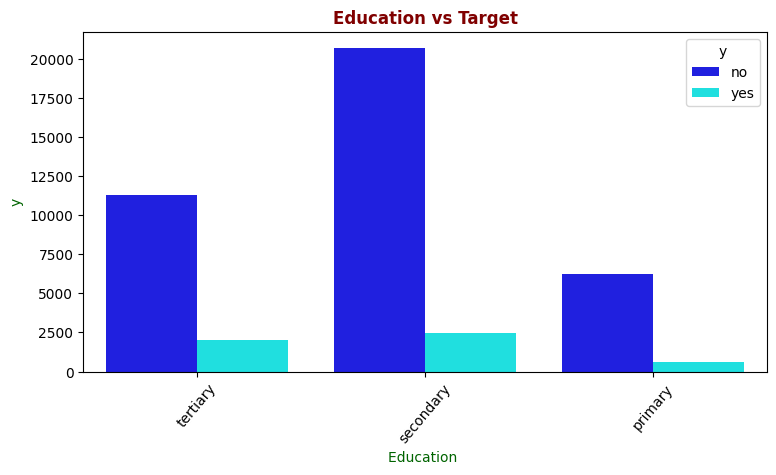

In [44]:
plt.figure(figsize=(30,15), dpi=100)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['blue', 'cyan']
sns.countplot(x='education_qual',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Education vs Target', fontweight='bold', color='maroon')
plt.xlabel('Education ', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

# Call_Type

In [45]:
df.call_type.isna().sum()

0

In [46]:
df['call_type'].value_counts()

cellular     28213
unknown      12286
telephone     2694
Name: call_type, dtype: int64

In [47]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((12283) / (28210+2694+12283)) * 100 )

Percentage for "Unknown":  28.441429133767105


Text(0, 0.5, 'y')

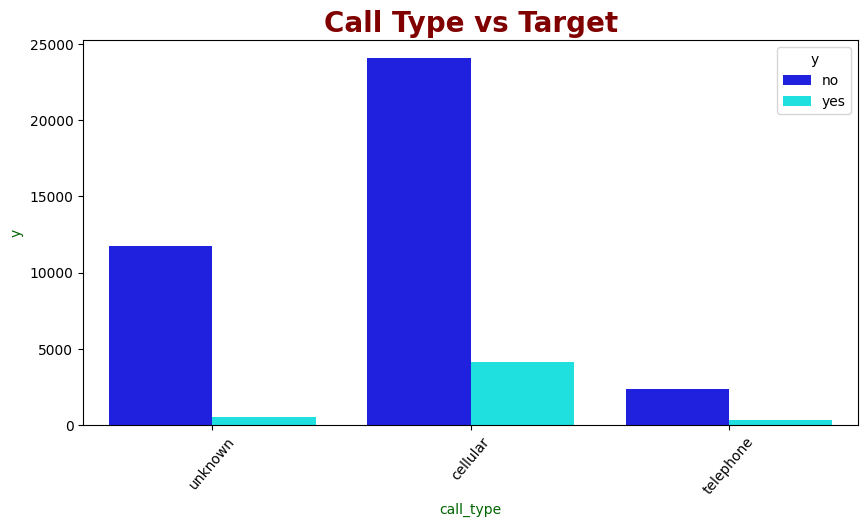

In [48]:
plt.figure(figsize=(10,5), dpi=100)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
#plt.subplot(3,3,1)
my_colors = ['blue', 'cyan']
sns.countplot(x='call_type',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target',fontsize=20,fontweight='bold', color='maroon')
plt.xlabel('call_type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

## DAY

In [49]:
df['day'].value_counts()

20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1760
28    1740
7     1739
29    1661
19    1657
15    1649
12    1542
13    1529
9     1484
30    1481
11    1397
4     1372
16    1331
2     1244
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: day, dtype: int64

In [50]:
df.day.isna().sum()

0

In [51]:
df.day.describe()

count    43193.000000
mean        15.809414
std          8.305970
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [52]:
#Finding outlier
q3 = df.day.quantile(0.75)
q1 = df.day.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(40.5, -11.5)

No Outlier Found in Day Column

# Duration

In [53]:
df["dur"].value_counts()

124     177
89      172
90      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

In [54]:
df.dur.isna().sum()

0

In [55]:
df.dur.describe()

count    43193.000000
mean       258.323409
std        258.162006
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: dur, dtype: float64

In [56]:
q3 = df.dur.quantile(0.75)
q1 = df.dur.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(640.5, -219.5)

Outlier is present in duration column

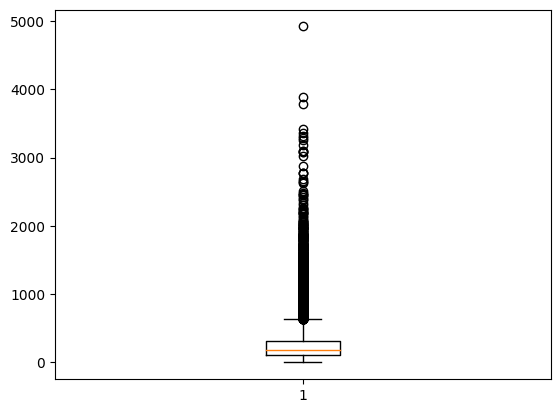

In [57]:
# Creating plot
plt.boxplot(df['dur'])

# show plot
plt.show()

Treating Outlier using clip method

In [58]:
df.dur = df.dur.clip(lower_threshold, upper_threshold)

In [59]:
df.dur.describe()

count    43193.000000
mean       234.770379
std        176.234987
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.500000
Name: dur, dtype: float64

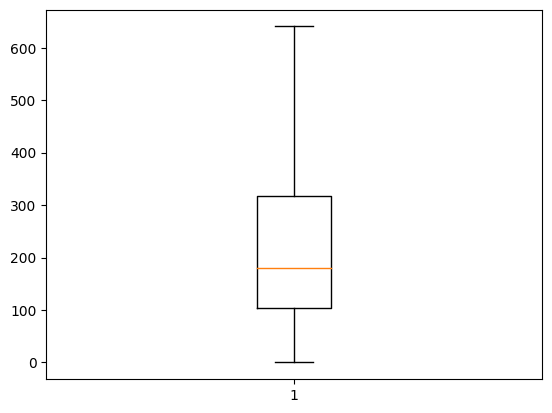

In [60]:

# Creating plot
plt.boxplot(df['dur'])

# show plot
plt.show()

In [61]:
df["dur"]=df["dur"].astype(int)

#Number of Calls

In [62]:
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0


In [63]:
#df.rename(columns = {'aa':'num_calls'},inplace=True)
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)

In [64]:
df["num_calls"].unique()

array([ 1,  2,  3,  5,  4,  7,  8,  6,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 41, 26, 28, 55, 50, 38, 23, 20,
       29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [65]:
df["num_calls"].value_counts()

1     16742
2     11938
3      5277
4      3399
5      1703
6      1234
7       696
8       516
9       307
10      255
11      190
12      149
13      123
14       85
15       81
16       75
17       65
18       47
19       43
20       42
21       33
25       22
22       20
24       20
23       20
28       16
29       13
26       12
31       11
32        9
27        9
30        8
33        6
34        4
36        4
38        3
35        3
43        2
50        2
41        2
51        1
37        1
46        1
55        1
58        1
39        1
44        1
Name: num_calls, dtype: int64

In [66]:
df.num_calls.isna().sum()

0

In [67]:
df.num_calls.describe()

count    43193.000000
mean         2.758178
std          3.063987
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: num_calls, dtype: float64

In [68]:
q3 = df.num_calls.quantile(0.75)
q1 = df.num_calls.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

upper_threshold, lower_threshold

(6.0, -2.0)

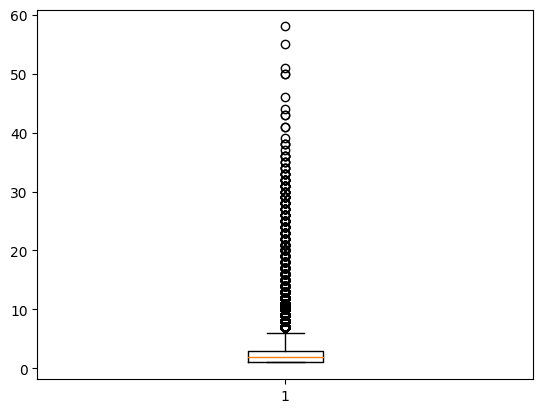

In [69]:
# Creating plot
plt.boxplot(df['num_calls'])

# show plot
plt.show()

Outlier found in Num_calls column hence using Clip method to treat them

In [70]:
df.num_calls = df.num_calls.clip(lower_threshold, upper_threshold)

In [71]:
df.num_calls.describe()

count    43193.000000
mean         2.393073
std          1.598848
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

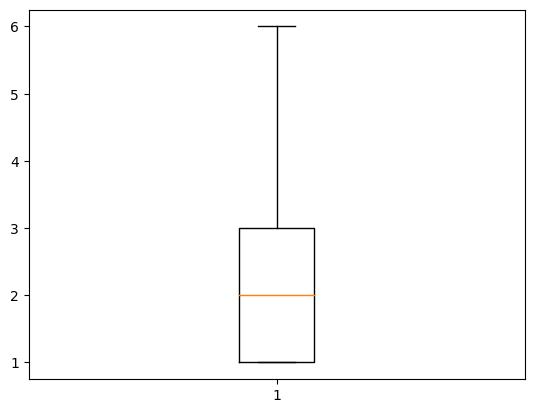

In [72]:
# Creating plot
plt.boxplot(df['num_calls'])

# show plot
plt.show()

#prev_outcome

In [73]:
df["prev_outcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [74]:
df["prev_outcome"].value_counts()

unknown    35286
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [75]:
df["prev_outcome"].isna().sum()

0

In [76]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no,0
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no,0


In [77]:
#Finding the percentage of unknown value
print('Percentage for "Unknown": ',((35286) / (4709+1774+1424+35286)) * 100 )

Percentage for "Unknown":  81.69379297571365


Percentange of unknown values is 81.69% , Hence we can keep it

Text(0, 0.5, 'y')

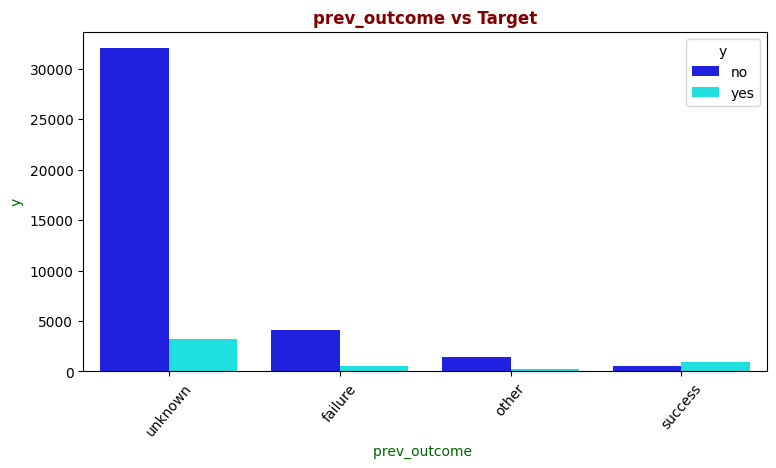

In [78]:
plt.figure(figsize=(30,15), dpi=100)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['blue', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('prev_outcome vs Target', fontweight='bold', color='maroon')
plt.xlabel('prev_outcome ', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

# Y Column(Target) ==>> Categorical Data

In [79]:
#checking for the data is balanced or not
df['y'].value_counts()

no     38172
yes     5021
Name: y, dtype: int64

In [80]:
#Finding the percentage of the data
print('Percentage for "no": ',((39916) / (39916+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39916+5289)) * 100 )

Percentage for "no":  88.29996681782988
Percentage for "yes":  11.700033182170113


from the above result we can clearly understand that the percentage for no is very high so the Majority class "no" with 88.29% and Minority class "yes" with 11.7%.

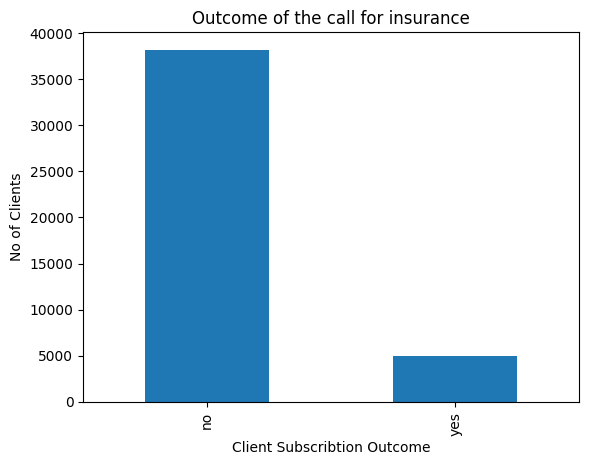

In [81]:
df['y'].value_counts().plot(kind='bar')
plt.title('Outcome of the call for insurance')
plt.xlabel('Client Subscribtion Outcome')
plt.ylabel('No of Clients')
plt.show()

# Missing Values

In [82]:
#checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

# Duplicates

In [83]:
#checking for no of duplicate values
df.duplicated().sum()

16

In [84]:
#droping duplicates
df = df.drop_duplicates()

All Duplicates removed

In [85]:
df.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no,0
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no,0


# EDA(Exploratory Data Analysis)

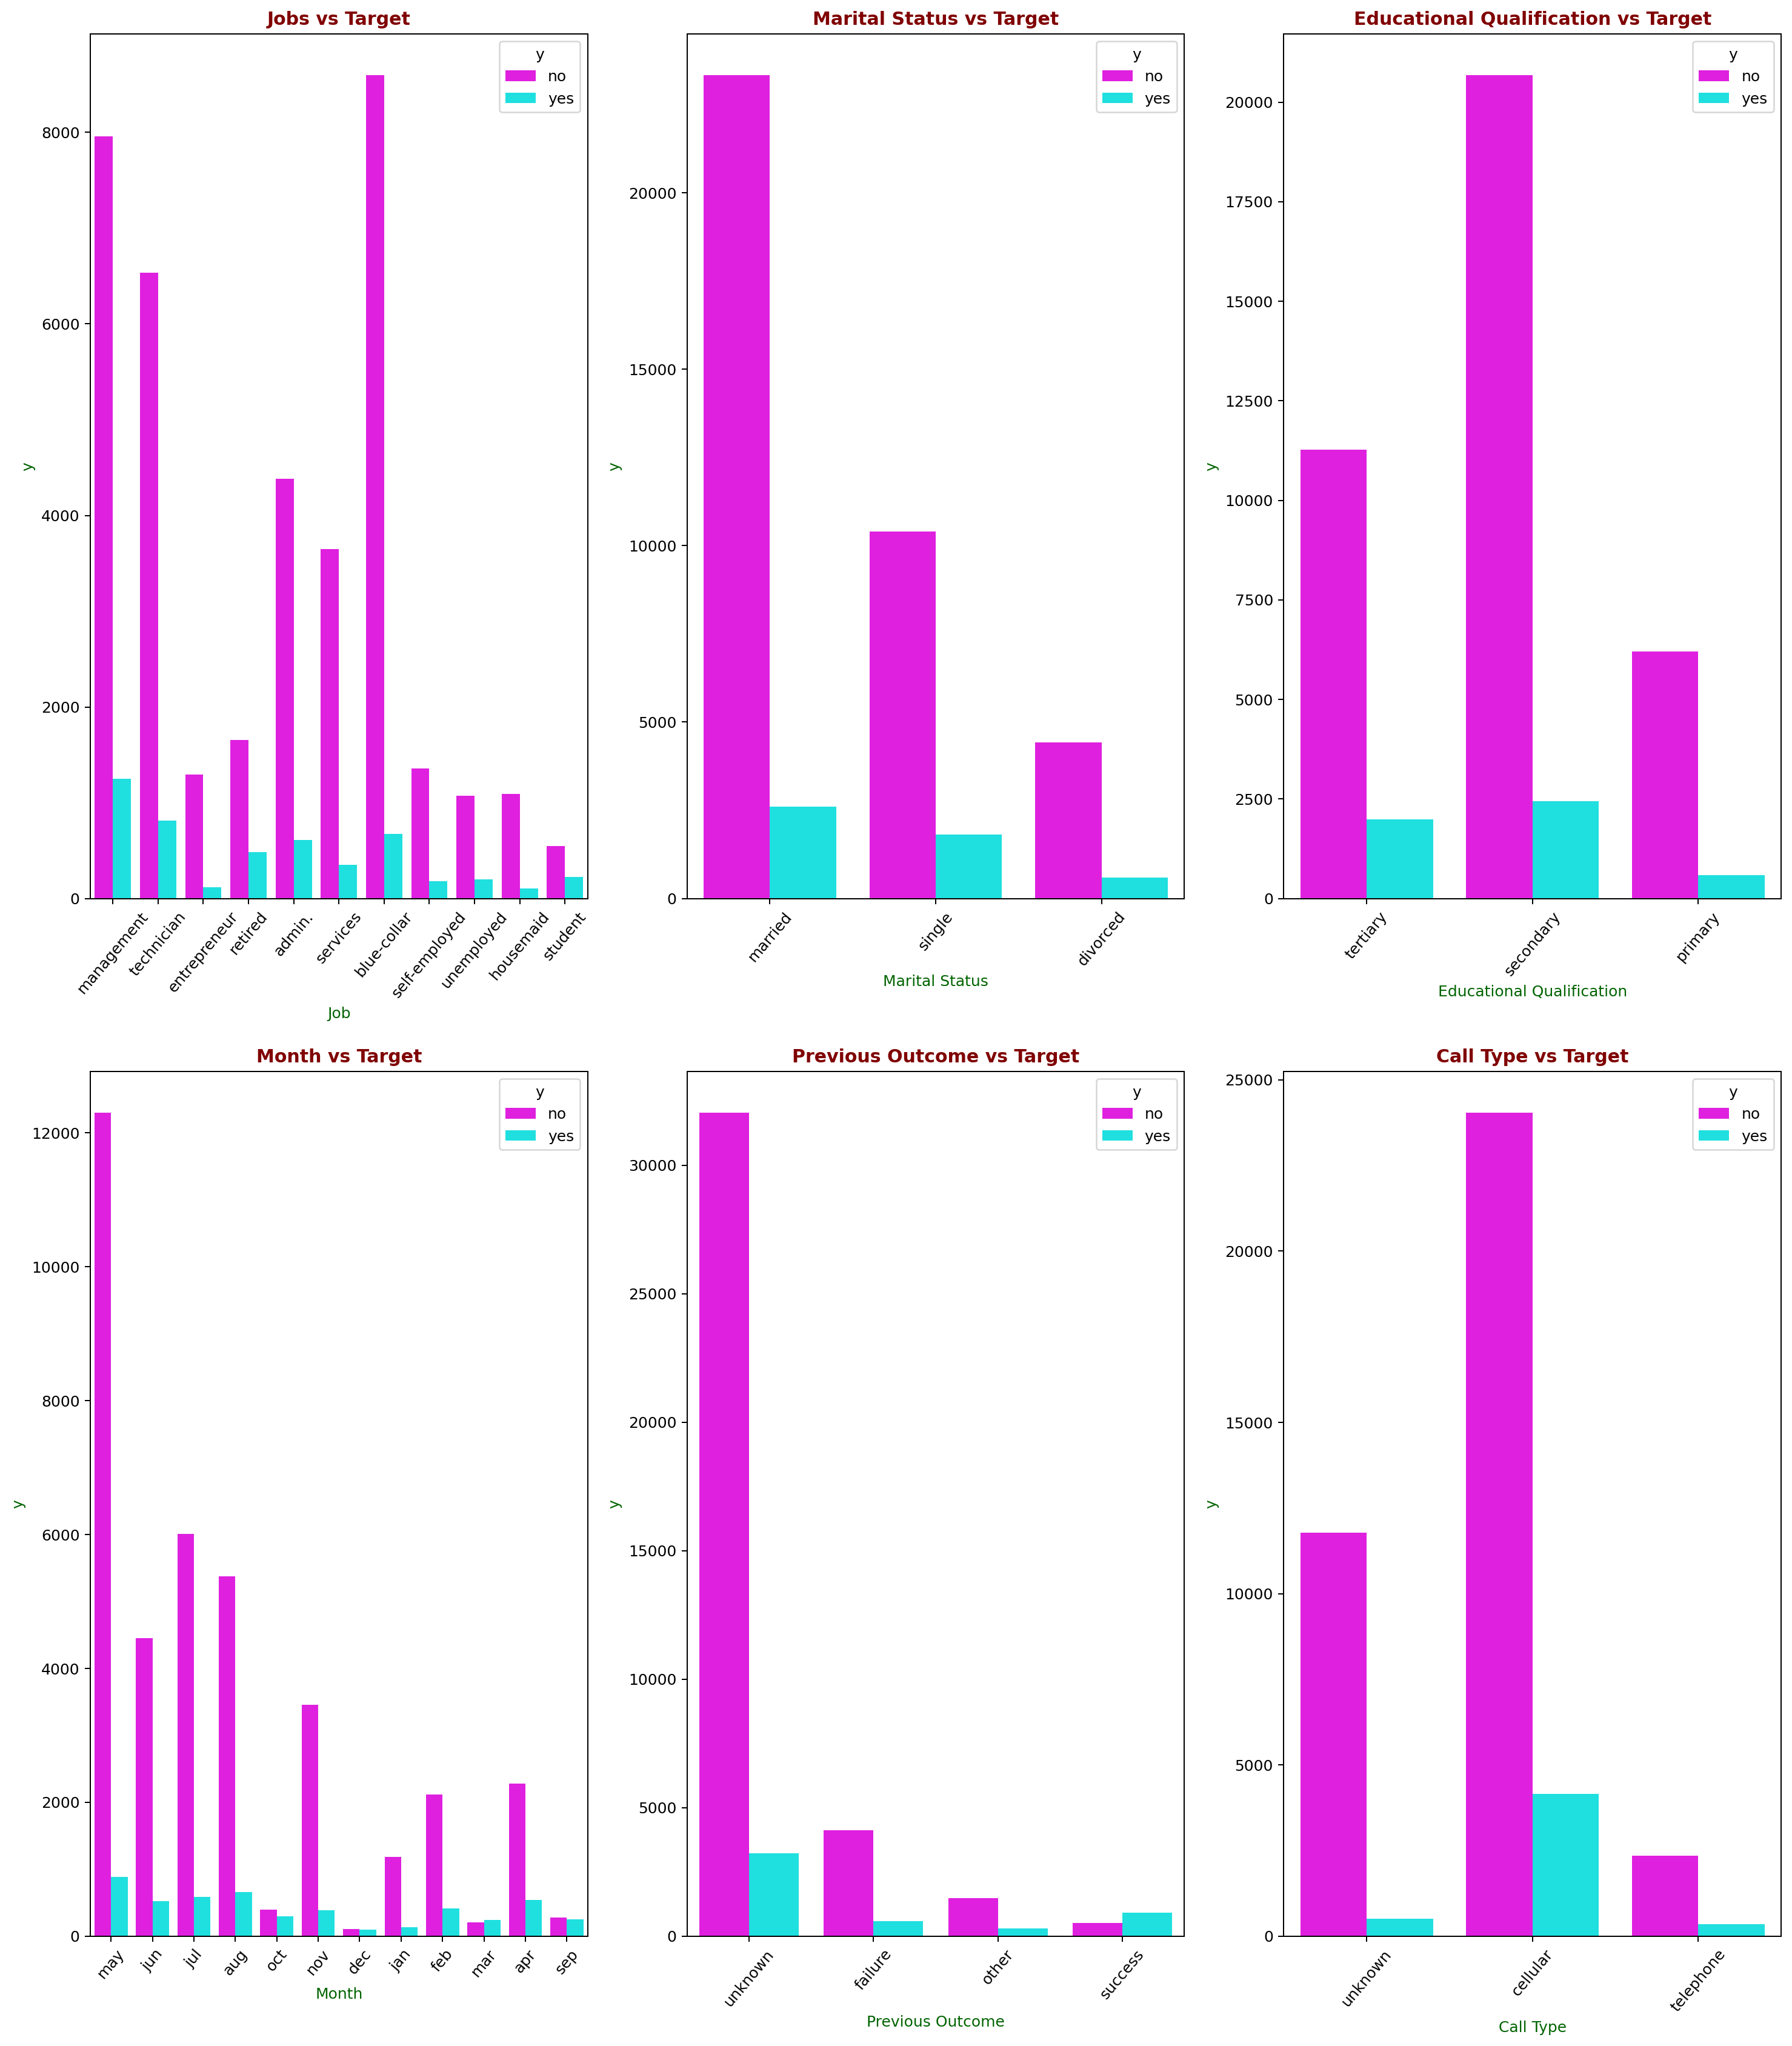

In [86]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='job',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='marital',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='education_qual',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='mon',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='prev_outcome',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='call_type',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


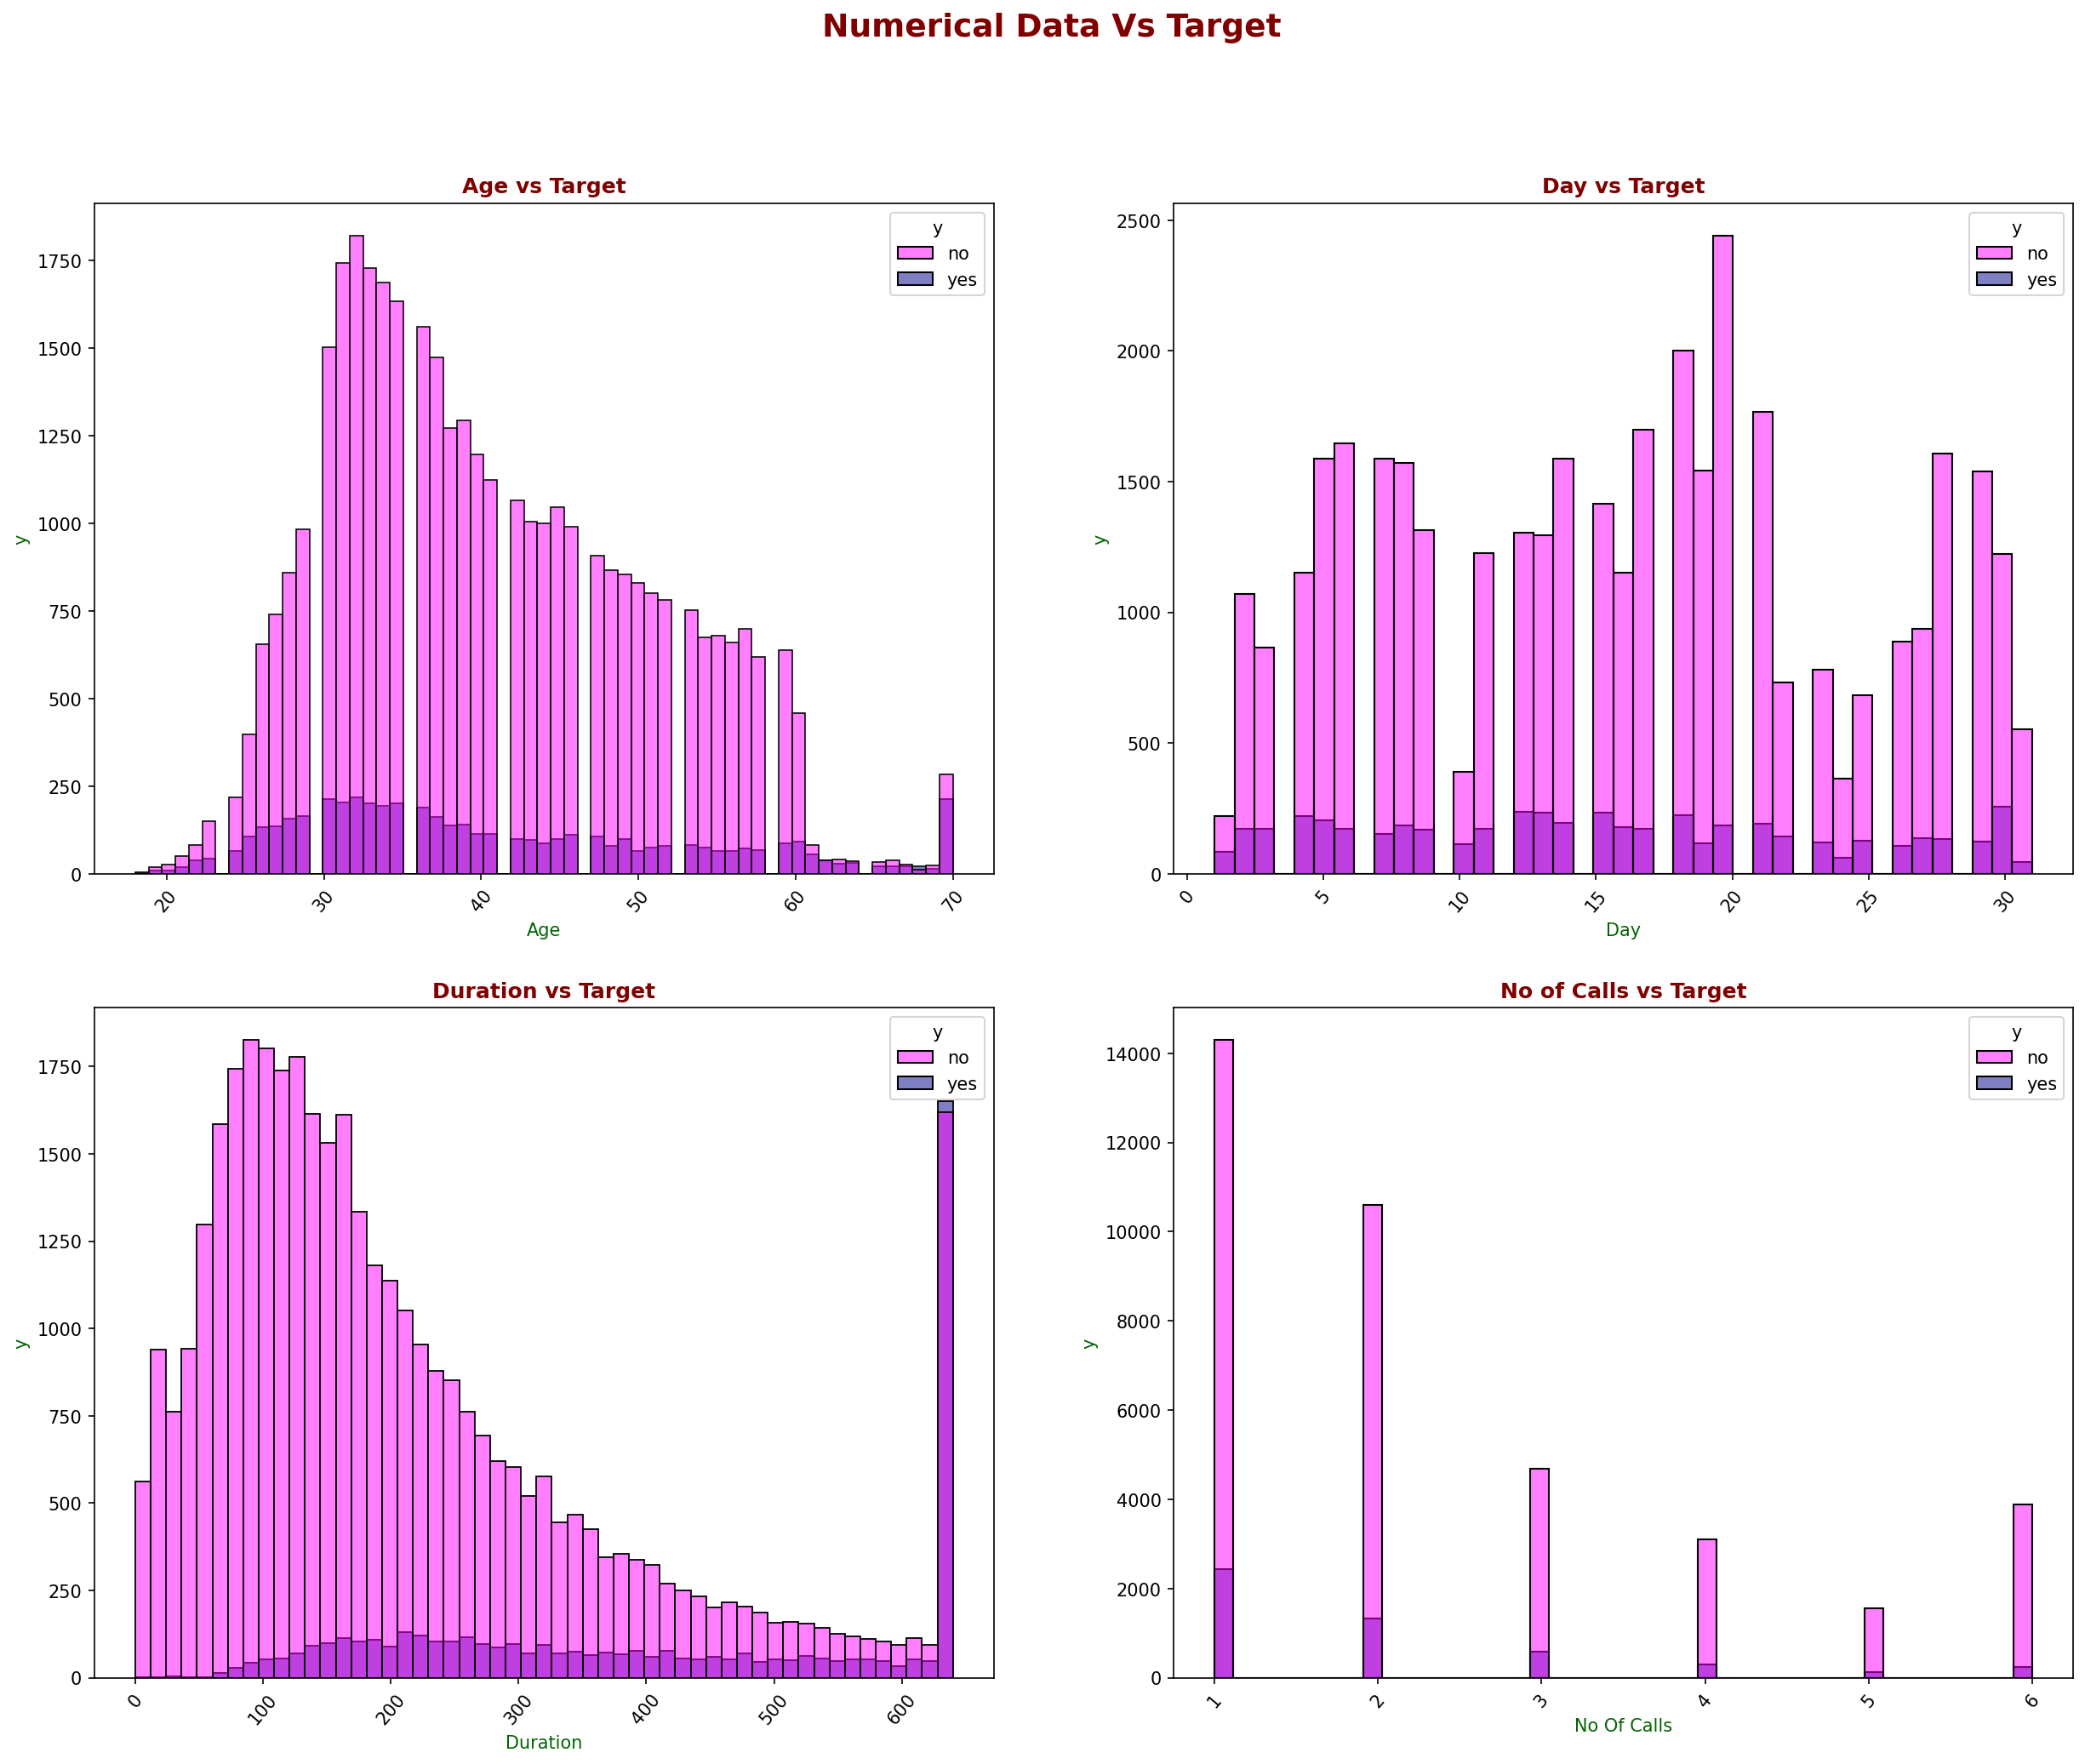

In [87]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon')

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['age','target']].corr()

#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')
#df[['day','target']].corr()

#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='num_calls',hue='y',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


In [88]:
# Putting column names in a list
columns = df.columns.to_list()
print(columns)

# Numerical Columns
num_col = df._get_numeric_data().columns.to_list()
print(num_col)

# Categorical Columns
cat_col = list(set(columns) - set(num_col))
print(cat_col)

['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome', 'y', 'target']
['age', 'day', 'dur', 'num_calls', 'target']
['job', 'education_qual', 'prev_outcome', 'y', 'call_type', 'mon', 'marital']



# Encoding All Categorical Columns

In [89]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

Encoding can be done on Categorical columns (JOB,MARITAL,EDUCATION,CALL_TYPE,PREV_OUTCOME)

In [90]:
#Encoding for job column (Label Encoding)
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,5,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,2,married,secondary,unknown,5,may,76,1,unknown,no,0


In [91]:
#Encoding for Marital status (Label Encoding)
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,5,3,secondary,unknown,5,may,151,1,unknown,no,0
2,33,2,1,secondary,unknown,5,may,76,1,unknown,no,0


In [92]:
#encoding for educational qualification (Label Encoding)
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,3,unknown,5,may,261,1,unknown,no,0
1,44,5,3,2,unknown,5,may,151,1,unknown,no,0
2,33,2,1,2,unknown,5,may,76,1,unknown,no,0


In [93]:
# Encoding for month column (Label Encoding)
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,3,unknown,5,1,261,1,unknown,no,0
1,44,5,3,2,unknown,5,1,151,1,unknown,no,0
2,33,2,1,2,unknown,5,1,76,1,unknown,no,0


In [94]:
# Encoding for call type column (Label Encoding)
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,3,1,5,1,261,1,unknown,no,0
1,44,5,3,2,1,5,1,151,1,unknown,no,0
2,33,2,1,2,1,5,1,76,1,unknown,no,0


In [95]:
# Encoding for previous outcome column (Label Encoding)
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})
df.head(3)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,8,1,3,1,5,1,261,1,1,no,0
1,44,5,3,2,1,5,1,151,1,1,no,0
2,33,2,1,2,1,5,1,76,1,1,no,0


Features & Target Selection

In [96]:
# X --> Feature y-- > Target

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

# SPLIT

In [97]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42 )


In [98]:
print(x_train,y_train)

[[ 49   8   1 ... 120   3   1]
 [ 50   1   1 ... 287   1   1]
 [ 52   1   1 ... 246   1   2]
 ...
 [ 44   8   2 ...  55   2   3]
 [ 35   3   1 ... 274   2   1]
 [ 52   8   2 ... 335   1   1]] [1 0 0 ... 0 0 0]


# Balancing

In [99]:
#Balancing the data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [100]:
print(len(x_train_smt))
print(len(y_train_smt))

51532
51532


# SCALING

In [101]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# MODELLING

LOGISTIC REGRESSION

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7615794349235757

In [103]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.92805035, 0.07194965],
       [0.97266414, 0.02733586],
       [0.21508563, 0.78491437],
       ...,
       [0.61556637, 0.38443363],
       [0.88340426, 0.11659574],
       [0.83960531, 0.16039469]])

In [104]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auroc,2))

AUROC score for logistic regression  :   0.89
